In [1]:
import os
import glob
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

## data loading

In [2]:
dataset_path = "data/synth_sim2real/train"

In [3]:
file_names = glob.glob(f"{dataset_path}/episode_*.npy")
assert len(file_names) > 0, f"WARNING: no data in {dataset_path}!"

data = []
for file in tqdm(file_names):
    data.append(np.load(file, allow_pickle=True))

100%|██████████| 10/10 [00:00<00:00, 94.47it/s]


In [4]:
data[0][0].keys()

dict_keys(['lowdim_qpos', 'lowdim_ee', 'front_rgb', 'shoulder_rgb', 'wrist_rgb', 'obj_pose', 'language_instruction', 'action'])

In [5]:
[len(sample) for sample in data]

[63, 62, 64, 62, 64, 63, 64, 62, 62, 63]

In [6]:
img_key = "front_rgb" # "215122255213_rgb"

In [7]:
ee_pose = np.concatenate([[np.stack(d["lowdim_ee"]) for d in sample] for sample in data])
actions = np.concatenate([[np.stack(d["action"]) for d in sample] for sample in data])
imgs = np.concatenate([[np.stack(d[img_key]) for d in sample] for sample in data])

## video

In [8]:
import imageio
from IPython.display import Video, display
os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/bin/ffmpeg"

imageio.mimwrite('tmp.mp4', imgs[:250])
display(Video('tmp.mp4'))

In [9]:
act_tmp = actions.copy()

# Sample 3D data
a = ee_pose[:, 6] < 0.05
b = ee_pose[:, 3] < 0.15
final_mask = np.logical_and(a, b)
acts = actions[final_mask]
x, y, z = acts[:, 0], acts[:, 1], acts[:, 2]

# Create a 3D scatter plot
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=x,
            y=y,
            z=z,
            mode="markers",
            # marker=dict(
            #     size=5,
            #     color=actions[
            #         :, -1
            #     ],  # z,  # set color to an array/list of desired values
            #     # colorscale='inferno',  # choose a colorscale
            #     opacity=0.8,
            # ),
        )
    ]
)

# Make the plot interactive by allowing user to rotate, zoom, etc.
fig.update_layout(
    scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z"),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10),
)

fig.show()

## poses

In [17]:
frm, to = 0, -1 # 65 + 69, -1

colors = []
for sample in data:
    colors += list(range(0, len(sample)))
colors = np.array(colors)

# Sample 3D data
x, y, z = ee_pose[:, 0], ee_pose[:, 1], ee_pose[:, 2]

# Create a 3D scatter plot
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=x[frm:to],
            y=y[frm:to],
            z=z[frm:to],
            mode="markers",
            marker=dict(
                size=5,
                color=colors,
                # color=actions[
                #     :, -1
                # ],
                # colorscale='inferno',
                opacity=0.8,
            ),
        )
    ]
)

# Make the plot interactive by allowing user to rotate, zoom, etc.
fig.update_layout(
    scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z"),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10),
)

fig.show()

## actions

In [19]:
# Sample 3D data
x, y, z = actions[:, 0], actions[:, 1], actions[:, 2] # ee_pose[:, 0], ee_pose[:, 1], ee_pose[:, 2]

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers',
                                   marker=dict(size=5,
                                               color=colors, # actions[:,-1], # z,  # set color to an array/list of desired values
                                               #colorscale='inferno',  # choose a colorscale
                                               opacity=0.8))])

# Make the plot interactive by allowing user to rotate, zoom, etc.
fig.update_layout(scene=dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()


## obj poses

In [12]:
stats = np.load(os.path.join(dataset_path, "obj_poses_train.npy"), allow_pickle=True).tolist()
poses = stats["obj_poses"]
successes = stats["successes"]

Text(0, 0.5, 'x')

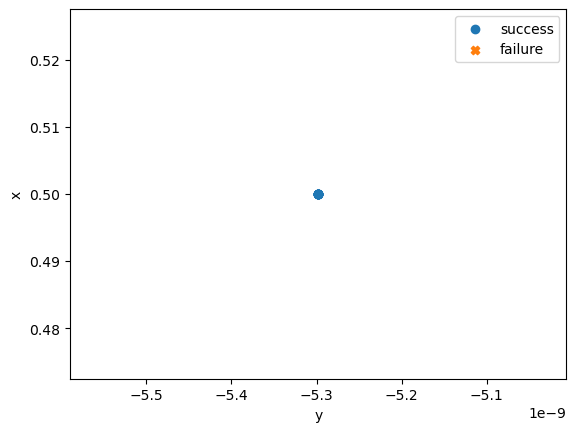

In [13]:
poss = [pos for pos in poses[:,:3]]
poss = np.stack(poss)

plt.scatter(poss[successes, 1], poss[successes, 0], color="tab:blue", label="success")
plt.scatter(poss[~successes, 1], poss[~successes, 0], color="tab:orange", marker="X", label="failure")
plt.legend()
plt.xlabel("y")
plt.ylabel("x")

Text(0.5, 0, 'yaw')

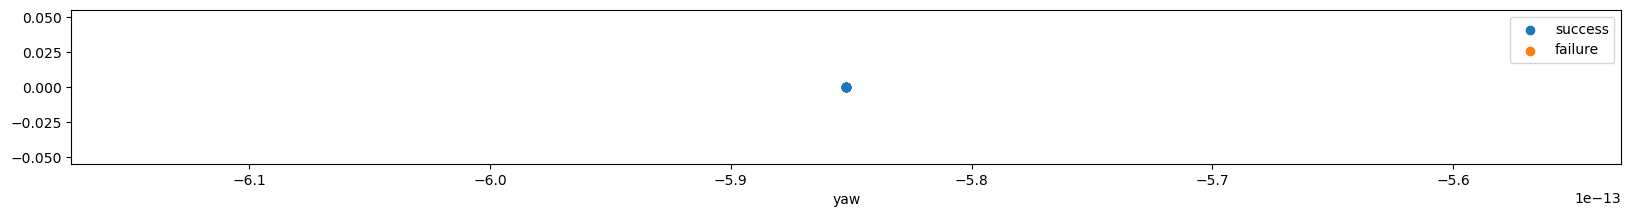

In [14]:
oris = [ori for ori in poses[:,3:]]
oris = np.stack(oris)

plt.figure(figsize=(20,2))
plt.scatter(oris[successes, 2], np.zeros_like(oris[successes, 0]), color="tab:blue", label="success")
plt.scatter(oris[~successes, 2], np.zeros_like(oris[~successes, 0]), color="tab:orange", label="failure")
plt.legend()
plt.xlabel("yaw")

In [15]:
# some of the outer angle randomizations fail

In [16]:
    # # modify data
    
    # dataset_path = "data/green_block/train"
    # key = "215122255213_rgb"
    
    # file_names = glob.glob(f"{dataset_path}/episode_*.npy")
    # assert len(file_names) > 0, f"WARNING: no data in {dataset_path}!"
    
    # for file in tqdm(file_names):
    #     data = np.load(file, allow_pickle=True)
    #     for i in range(len(data)):
    #         data[i][key] = data[i][key][:,160:]
    #         print(data[i][key].shape)
    #     np.save(file, data)